In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import sys
!pip install scikit-image

     --------------------------------------- 12.6/12.6 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 35.6 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 31.8 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 37.8 MB/s eta 0:00:00
     ---------------------------------------- 195.6/195.6 kB ? eta 0:00:00


In [1]:
import numpy as np 
import cv2 as cv
import os
from time import time
import asyncio
from skimage.io import imread, imshow
from matplotlib import pyplot as plt


In [2]:
from os import walk
TrainData = next(walk("Data"), (None, None, []))[2] 
print(TrainData)

['videoclip_962035.mp4', 'videoclip_962055.mp4', 'videoclip_962095.mp4', 'videoclip_962105.mp4', 'videoclip_962115.mp4']


In [ ]:
path = "Frames\\"
fpsLimit = 30
async def getFrames(cap,index):
    i=0
    prev = 0
    while (cap.isOpened()):
        time_elapsed = time() - prev
        ret, frame = cap.read()
        if ret == False:
            break
        if time_elapsed > 1./fpsLimit:
            prev = time()
            cv.imwrite(str(path)+'frame_'+str(index)+'_'+str(i)+'.jpg', frame) 
            i+=1
    
#collect frames from al media in data map

#for i in range(0,len(TrainData)):
#    TrainCap = cv.VideoCapture(f'Data\\{TrainData[i]}')
#    await getFrames(TrainCap,i)
#    print(TrainData[i] + f"  Read: {TrainCap.isOpened()}")

#collects frames from specific video
#vidIndex is video u want to collect
vidIndex = 4
TrainCap = cv.VideoCapture(f'Data\\{TrainData[vidIndex]}')
await getFrames(TrainCap,vidIndex)
print(TrainData[0] + f"  Read: {TrainCap.isOpened()}")
    

<h1>Extra:<h1>


In [5]:

images = []
path = "./Frames/"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    #images.append(imread(os.path.join(path,f)))
    
print("aantal training images: ", len(images))


aantal training images:  0


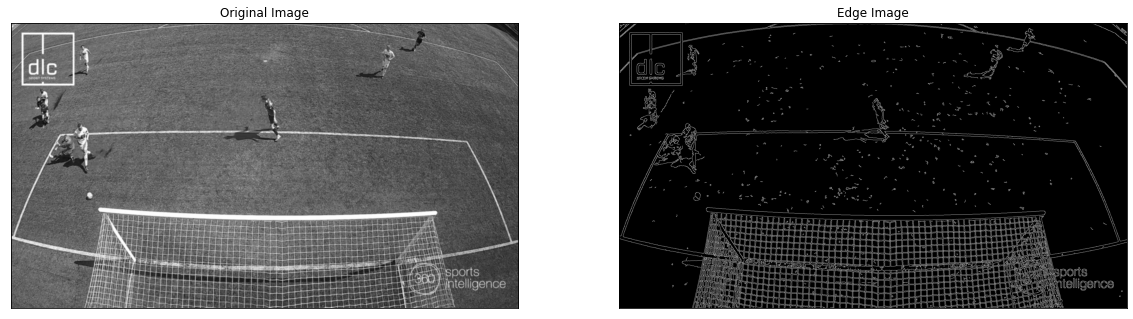

In [21]:
path = "./Frames/"
f = os.listdir(path)[1000]
frame = cv.imread(os.path.join(path,'frame_0_4926.jpg'))
frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
frame = cv.GaussianBlur(frame, (5, 5), 1.4)
edges = cv.Canny(frame,100,200)

plt.figure(figsize=(20, 20))
plt.subplot(121),plt.imshow(frame,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


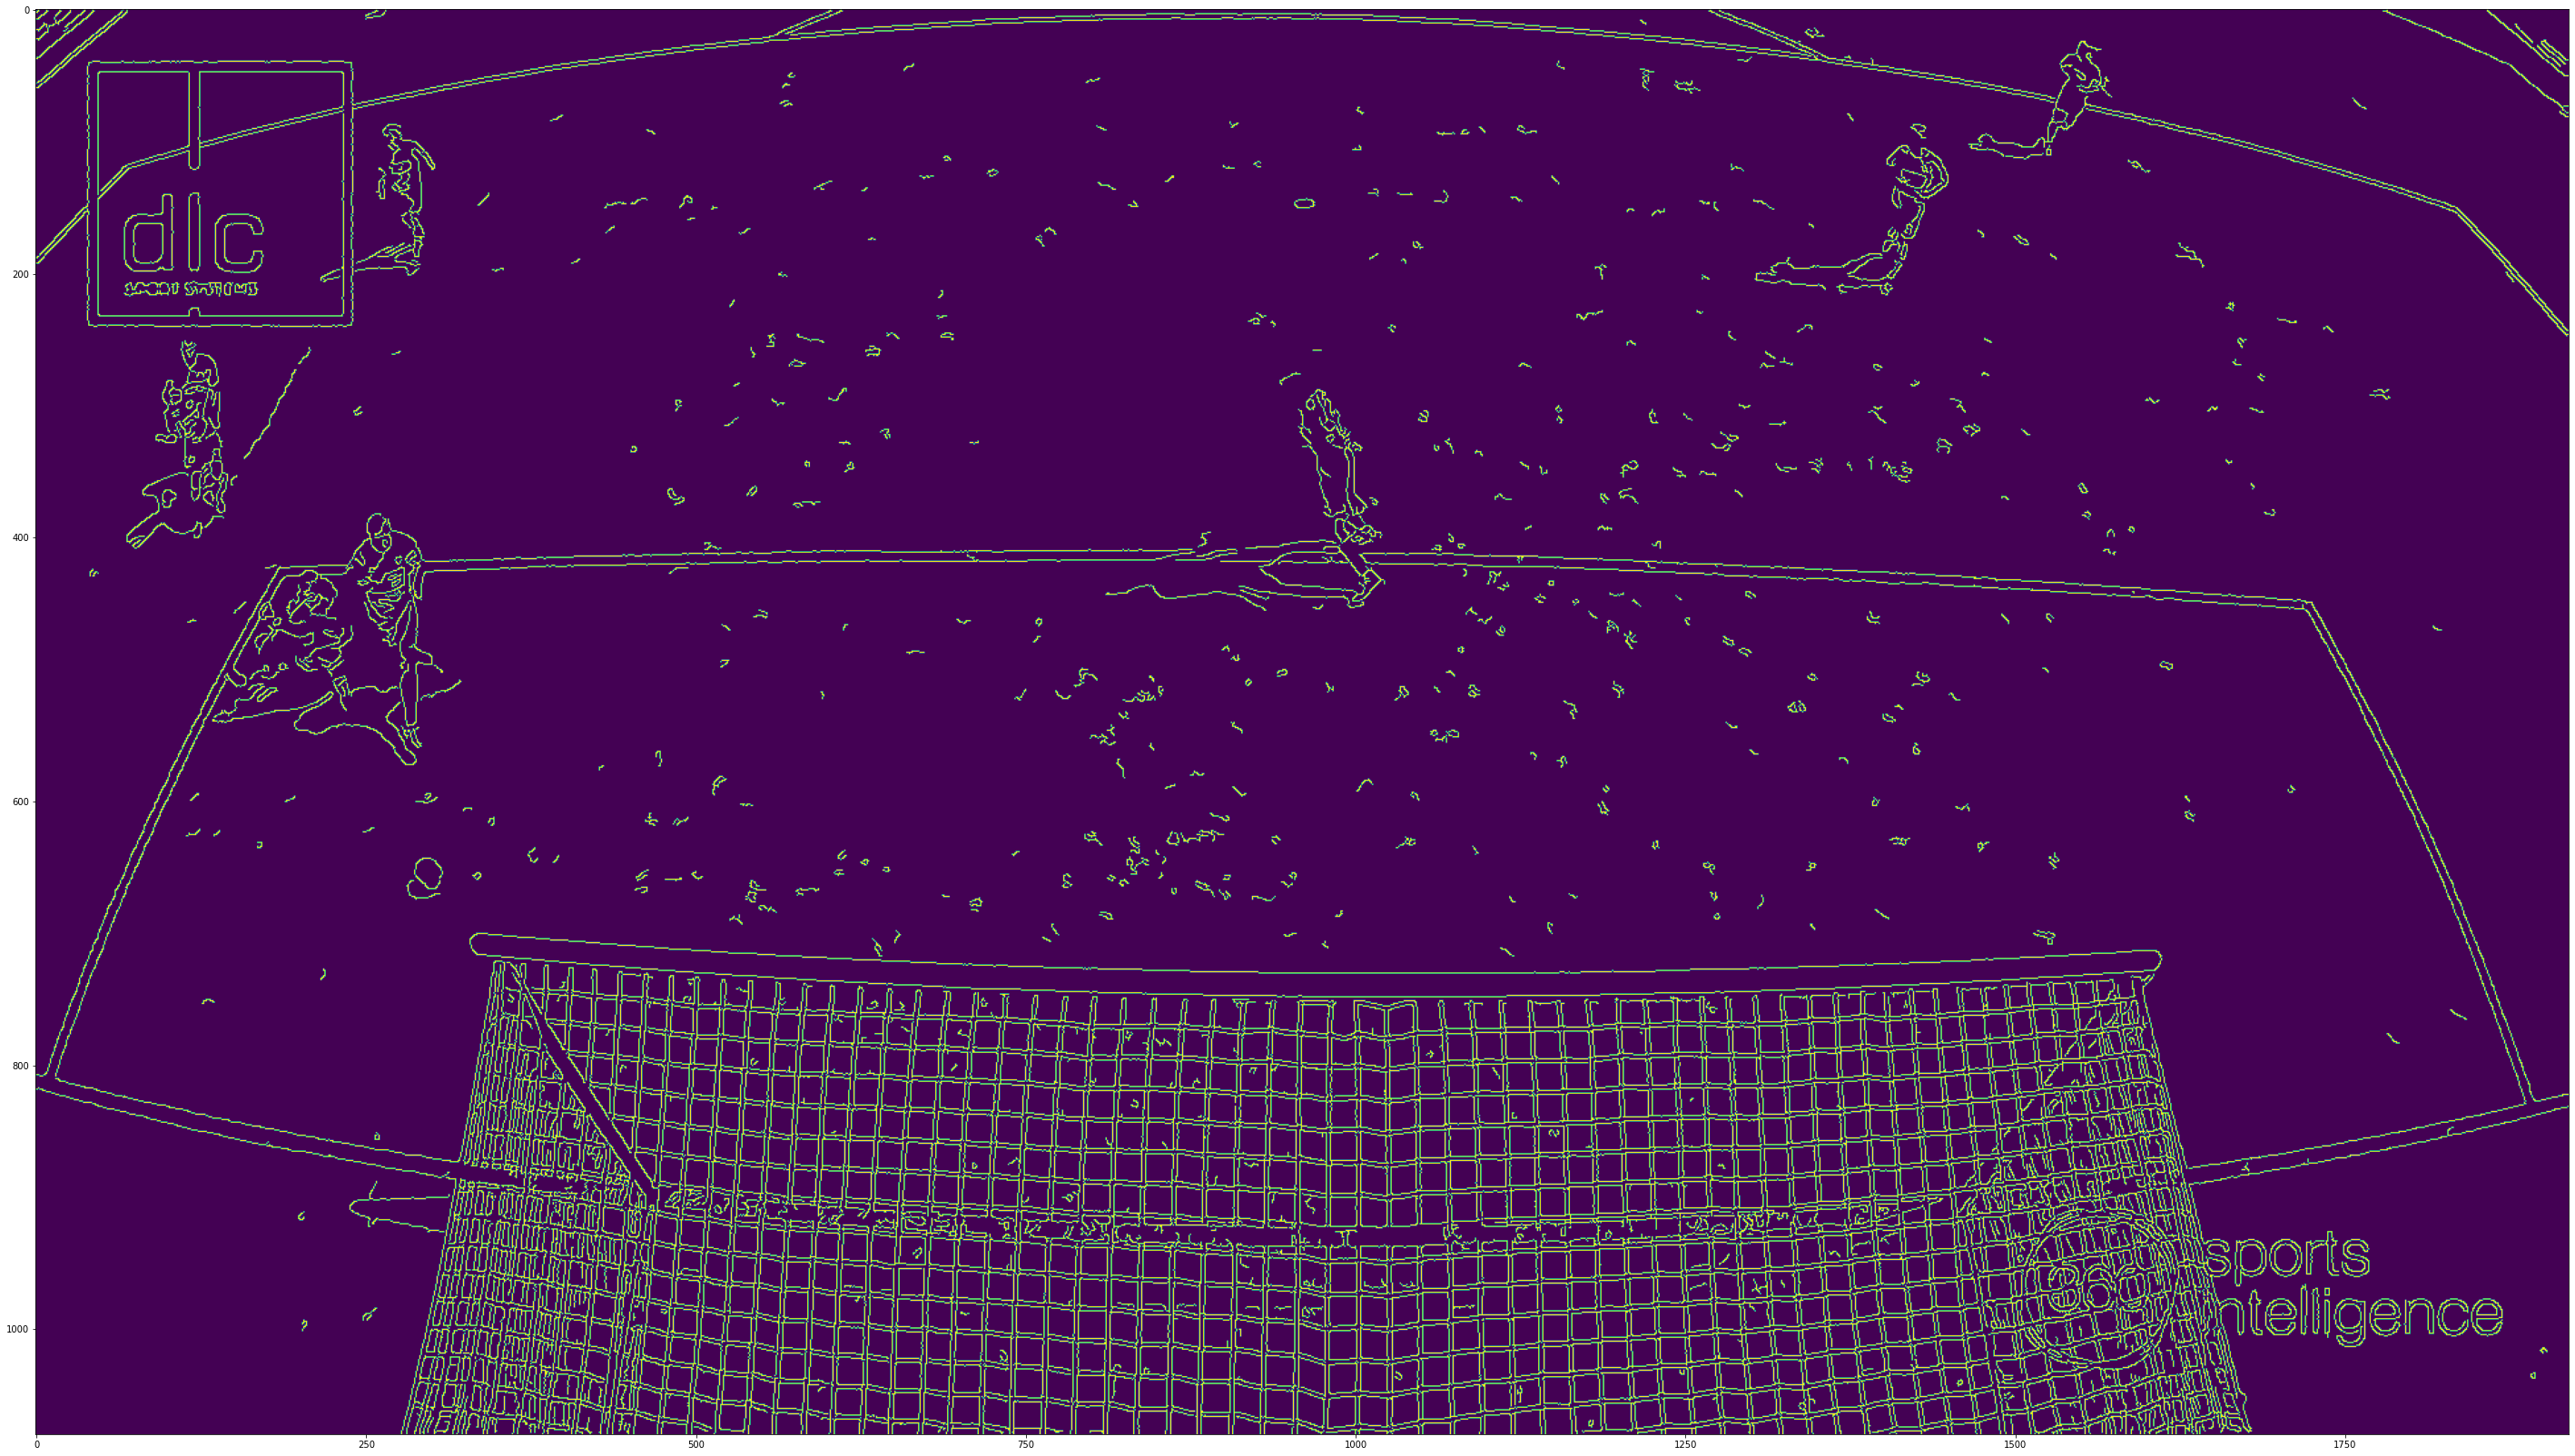

In [24]:
plt.figure(figsize=(50, 50))
plt.imshow(edges,cmap = 'gray')

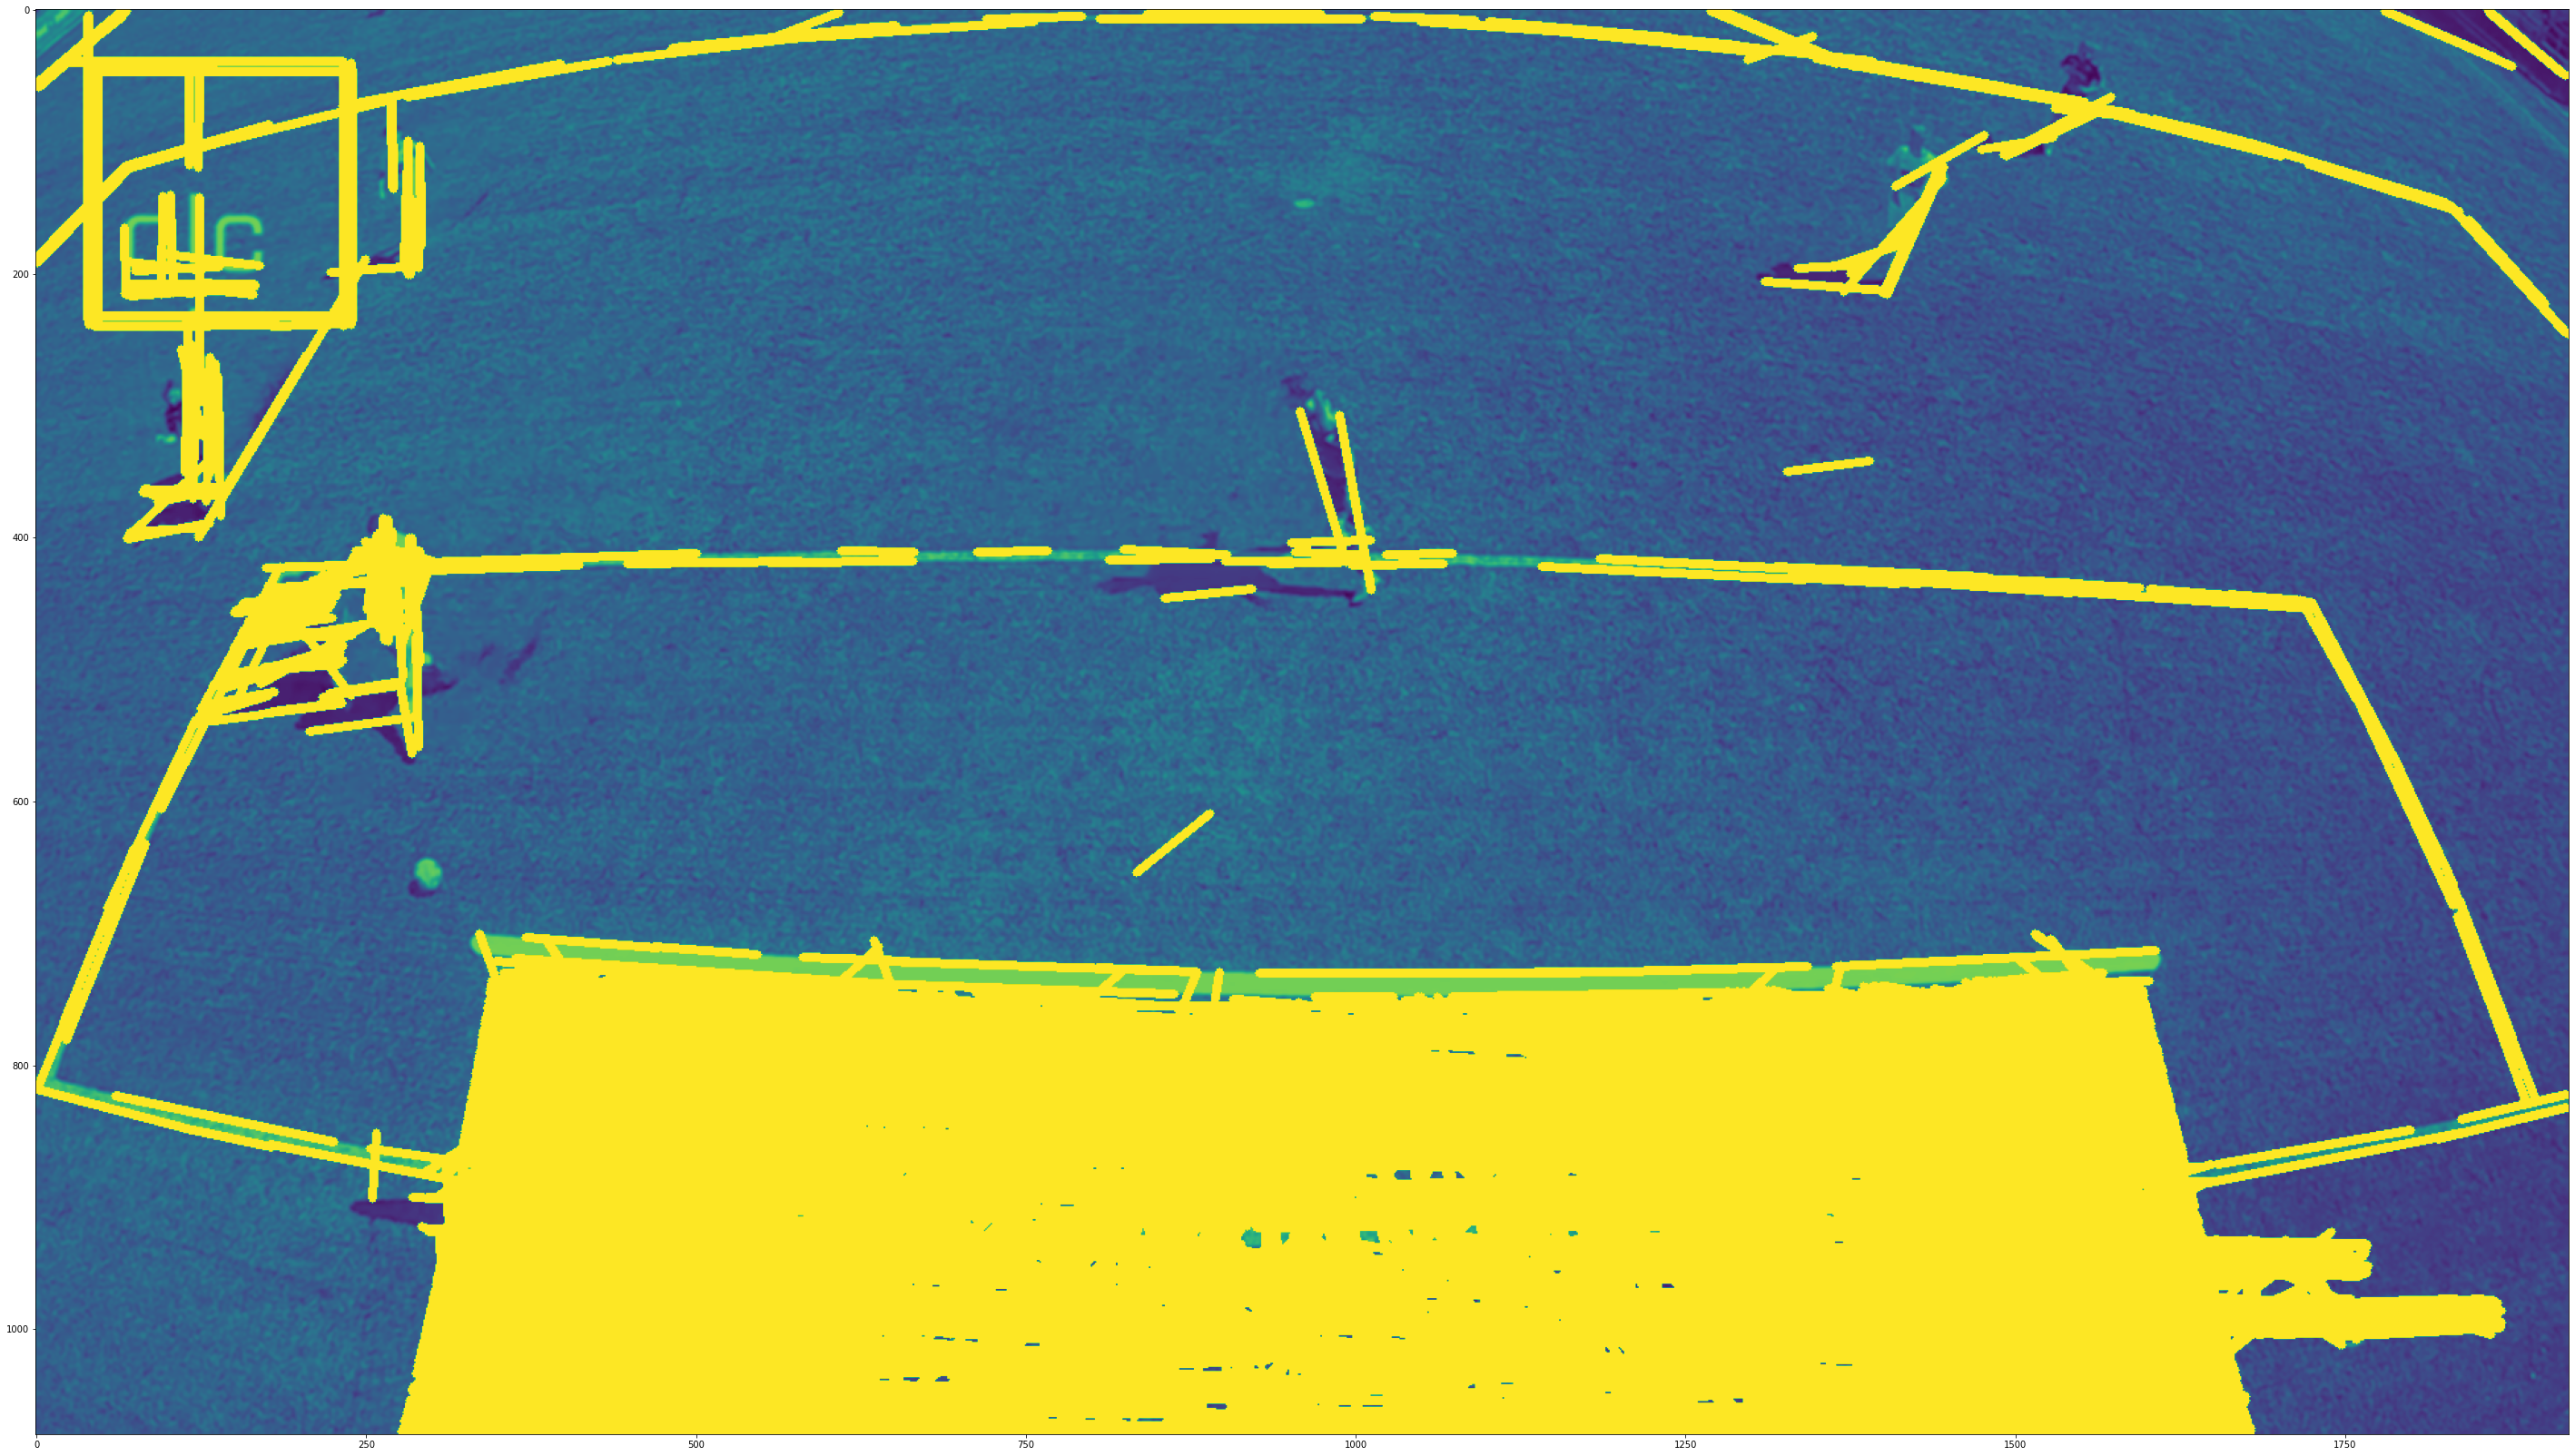

In [23]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(frame) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
# Draw the lines on the  image
lines_edges = cv.addWeighted(frame, 0.8, line_image, 1, 0)

plt.figure(figsize=(50, 50))
plt.imshow(lines_edges)

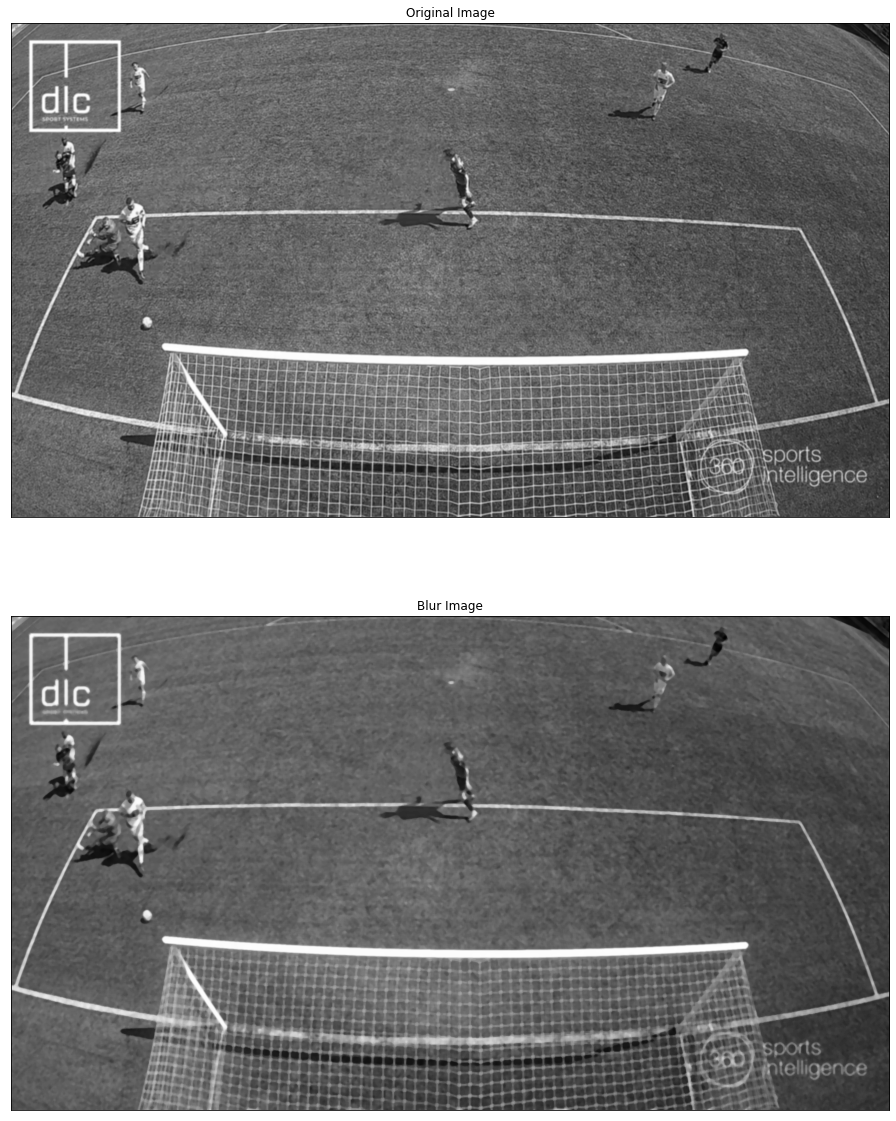

In [10]:
blur = cv.medianBlur(frame,7)

plt.figure(figsize=(20, 20))
plt.subplot(211),plt.imshow(frame,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.show()

1


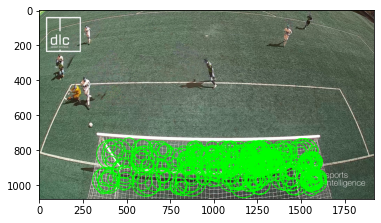

In [18]:
# finds the circles in the grayscale image using the Hough transform
path = "./Frames/"
frame = cv.imread(os.path.join(path,'frame_0_4926.jpg'))
output = frame.copy()

frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
blur = cv.medianBlur(frame,7)

height, width = frame.shape[:2]
maxRadius = int(1.1*(width/12)/2)
minRadius = int(0.02*(width/12)/2)
print(minRadius)
circles = cv.HoughCircles(image=blur, 
                           method=cv.HOUGH_GRADIENT, 
                           dp=1.2, 
                           minDist=2*minRadius,
                           param1=80,
                           param2=80,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )
if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv.circle(output, (x, y), r, (0, 255, 0), 4)

    plt.imshow(output)
else:
    print ('No circles found')
